# TD5 Continous Protein Switch 
* basic component of Mitogen Activated Protein Kinase (MAPK) signaling networks in cells
* here just one level of double phosphorylation (same kinase MAPKK for the phosporylations, same phosphatase MKP for the dephosphorylations)
* **input MAPKK**
* **output MPP**

### Model 26 of BioModels
Markevich, N.I., Hoek, J.B., Kholodenko, B.N., 2004. Signaling switches and bistability arising from multisite phosphorylation in protein kinase cascades. Journal of Cell Biology 164, 353–359.

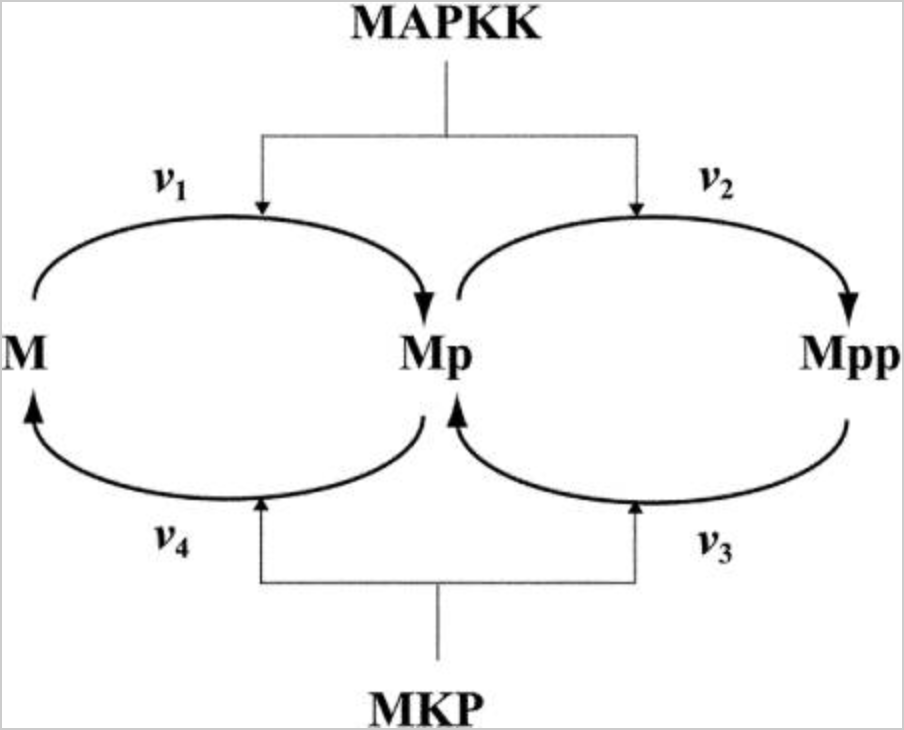




In [1]:
load('library:biomodels/BIOMD0000000026.xml').
list_model.

k1*M*MAPKK for M+MAPKK=>M_MAPKK.
k_1*M_MAPKK for M_MAPKK=>M+MAPKK.
k2*M_MAPKK for M_MAPKK=>MAPKK+Mp.
k3*Mp*MAPKK for MAPKK+Mp=>Mp_MAPKK.
k_3*Mp_MAPKK for Mp_MAPKK=>MAPKK+Mp.
k4*Mp_MAPKK for Mp_MAPKK=>MAPKK+Mpp.
h1*Mpp*MKP3 for MKP3+Mpp=>Mpp_MKP3.
h_1*Mpp_MKP3 for Mpp_MKP3=>MKP3+Mpp.
h2*Mpp_MKP3 for Mpp_MKP3=>Mp_MKP3_dep.
h3*Mp_MKP3_dep/uVol for Mp_MKP3_dep=>MKP3+Mp.
h_3*Mp*MKP3/uVol for MKP3+Mp=>Mp_MKP3_dep.
h4*Mp*MKP3 for MKP3+Mp=>Mp_MKP3.
h_4*Mp_MKP3 for Mp_MKP3=>MKP3+Mp.
h5*Mp_MKP3 for Mp_MKP3=>M_MKP3.
h6*M_MKP3 for M_MKP3=>M+MKP3.
h_6*M*MKP3 for M+MKP3=>M_MKP3.
present(M,500.0).
present(Mp,0.0).
present(Mpp,0.0).
present(MAPKK,50.0).
present(MKP3,100.0).
present(M_MAPKK,0.0).
present(Mp_MAPKK,0.0).
present(Mpp_MKP3,0.0).
present(Mp_MKP3_dep,0.0).
present(Mp_MKP3,0.0).
present(M_MKP3,0.0).
parameter(
  uVol = 1.0,
  k1 = 0.02,
  k_1 = 1.0,
  k2 = 0.01,
  k3 = 0.032,
  k_3 = 1.0,
  k4 = 15.0,
  h1 = 0.045,
  h_1 = 1.0,
  h2 = 0.092,
  h3 = 1.0,
  h_3 = 0.01,
  h4 = 0.01,
  h_4 = 1.0,

#### Reaction graph analysis: conservation laws for M, MAPKK and MKP
* computation based on the *reaction graph* structure
 * Petri net place-invariants as structural conservation laws for the ODE semantics
 * constraint logic programming algorithm [(Soliman12amb)](https://lifeware.inria.fr/wiki/Main/Publications#Soliman12amb)

In [2]:
search_conservations.

M+M_MAPKK+M_MKP3+Mp+Mp_MAPKK+Mp_MKP3+Mp_MKP3_dep+Mpp+Mpp_MKP3
MAPKK+M_MAPKK+Mp_MAPKK
MKP3+M_MKP3+Mp_MKP3+Mp_MKP3_dep+Mpp_MKP3
3 complex invariant(s)


#### Influence graph analysis: multistationarity analysis
* computation based on the *influence graph*
 * existence of positive circuit as necessary condition for multistationarity [(Soliman13bmb)](https://lifeware.inria.fr/wiki/Main/Publications#Soliman13bmb)
 * graph rewriting algorithm [(BFS18jtb)](https://lifeware.inria.fr/wiki/Main/Publications#BFS18jtb)
 

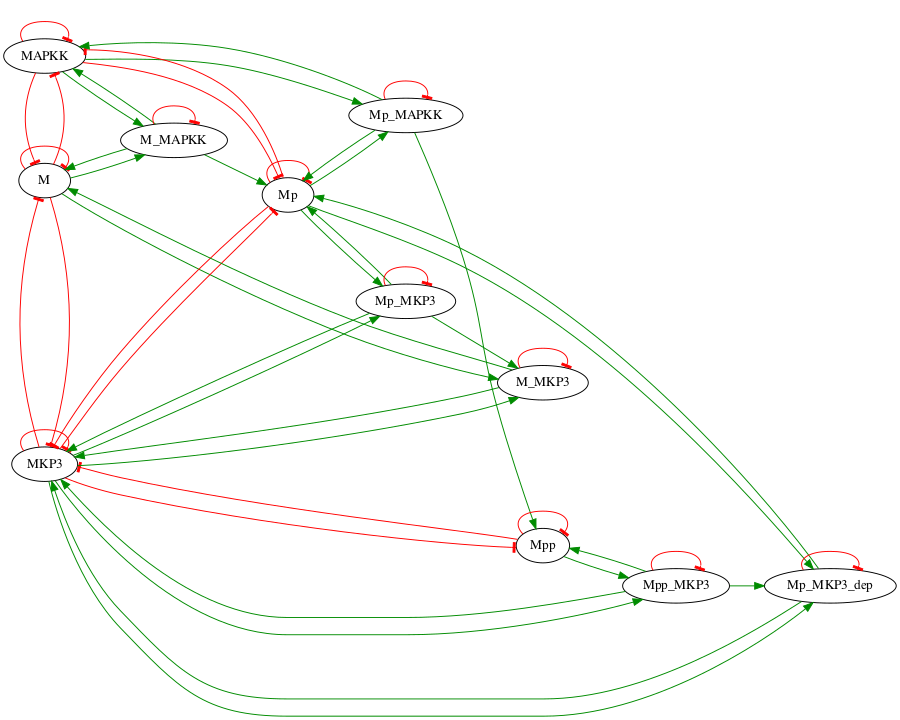

In [3]:
draw_influences.

In [4]:
check_multistability.

There may be non-degenerate multistationarity, positive circuit detected.


#### Continuous dynamics

In [5]:
list_ode.

In [6]:
numerical_simulation. plot.

#### Stochastic dynamics
* similar behavior because high number of molecules

In [7]:
numerical_simulation(method:ssa, stochastic_conversion:1). plot.

### Dose-response diagrams

* Dose response diagrams are obtained in Biocham by simulation by slowly varying the input and drawing the output value after *sufficient time for stabilization*

* The steady state is not computed symbolically, but assumed to be reached over that time horizon for all values of the input.



#### Switch-like response
* S-shape response of the output Mpp as a function of the input concentration MAPKK
* (a stiffer response is obtained at the third level of the full three level MAPK cascade network)
* switch-like response, i.e. **analog-digital converter**


In [8]:
dose_response(MAPKK, 0, 100, time:1e4, show:Mpp).

#### Bistability
* bistability is shown by a bifurcation diagram obtained here by first slowly increasing the input and then decreasing it
* the *hysteresis* shows a memory effect which corresponds to the existence of two stable states in the rate equation

In [9]:
bifurcations(MAPKK, 0, 100, time:1e4, show:Mpp).

# Questions
### 1) does multistability arise on the first phosphorylation Mp ?

*write your answer here*

*...*


### 2) does multistability arise in absence of the second phosphorylation reactions ? 
try by setting kinetic parameters to 0